<div style="position: relative;">
<img src="https://user-images.githubusercontent.com/7065401/98728503-5ab82f80-2378-11eb-9c79-adeb308fc647.png"></img>

<h1 style="color: white; position: absolute; top:27%; left:10%;">
     INE Bootcamp
</h1>
<h2 style="color: white; position: absolute; top:36%; left:10%;">
    Data Analysis, Visualization and Predictive Modeling
</h2> 

<h3 style="color: #ef7d22; font-weight: normal; position: absolute; top:58%; left:10%;">
    <b>David Mertz, Ph.D.</b>
</h3>

<h3 style="color: #ef7d22; font-weight: normal; position: absolute; top:63%; left:10%;">
    <b>Data Scientist</b>
</h3>
</div>

<div style="position: relative;">
<img src="https://user-images.githubusercontent.com/7065401/98728503-5ab82f80-2378-11eb-9c79-adeb308fc647.png"></img>

<h1 style="color: white; position: absolute; top:27%; left:10%;">
     Day 2 Agenda
</h1>
<h3 style="color: white; position: absolute; top:36%; left:10%; line-height: 1.5;">
Continuing Python essentials<br/>
Break and programming exercises<br/>
The Ethics of Visualization<br/>
Break and thought exercises<br/>
Visualization using Pandas<br/>
Break and programming exercise<br/>
Advanced Pandas: Groupby, Timeseries<br/>
Break and programming exercise<br/>
Review and questions<br/>
</h3>
</div>

<div style="width: 100%; height: 200px; background-color: #222; text-align: center; padding-top: 20px; margin-bottom: 40px;">
<br><br>

<h1 style="color: white; font-weight: bold;">
    The Ethics of Visualization
</h1>

<br><br> 
</div>

Before we decide to use a visualization library to represent numeric, quantitative, and scientific data, we should think about the *ethics* of information presentation.  To a large extent, the same kinds of advice apply even to tabular and textual information, but it becomes especially acute in regard to graphs and other kinds of information visualization.

The responsibility of anyone presenting numeric information is to present it:

* accurately
* meaningfully
* truthfully
* coherently
* minimizing distortion
* eschewing extraneous elements
* allowing discernment of relevant features 

This is difficult with complex and highly dimensional data, but the responsibility remains with the creator and presenter. 

In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 15

<h2 style="font-weight: bold;">
    Practicing Good Judgement
</h2>

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

Choosing the correct representation is nuanced and requires judgement.  No *a priori* rules can decide all these issues, but this module presents some good rules of thumb.  For better or worse, Matplotlib is very well able to create both good and bad graphs.  Use it wisely.

[Edward Tufte](Edward) is a founding figure in information visualization.  His thought and his works generally preceded the availability of some of the sophisticated computerized, online, and interactive visualization tools. To a small degree, some of his advice should be adjusted when graphs allow us to interactively rescale, zoom, rotate, re-facet, and perform other rearrangements of data.  But the large majority of what he wrote about print-based data visualization applies equally well to those you will generate, even if they will never be printed.

See _[The Visual Display of Quantitative Information](https://www.edwardtufte.com/tufte/books_vdqi)_ and his three other titles for profound discussion of these issues.

<h2 style="font-weight: bold;">
    Bad Graphs
</h2>

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

Simple data is often presented better in a table than in a graph.  But where a graph is used, some graphs are simply better suited to present "small data" than others.  Pie charts, notably, are **always a bad choice** (that are widely used).

Let us look at a dataset based on the [Stockhold International Peace Research Institute](https://en.wikipedia.org/wiki/Stockholm_International_Peace_Research_Institute) on 2018 [military expenditure](https://en.wikipedia.org/wiki/List_of_countries_by_military_expenditures).  The data can be presented completely and accurately using a table.

<h2 style="font-weight: bold;">
    A table
</h2>

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)


In [2]:
df = pd.read_csv("data/military.csv", index_col='Country')
df.sort_values('Spending (USD x 1e8)', ascending=False)

,Spending (USD x 1e8),GDP %
Country,,
USA,649.0,3.2
China,250.0,1.9
Saudi,67.6,8.8
India,66.5,2.4
France,63.8,2.3
Russia,61.4,3.9
UK,50.0,1.8
Germany,49.5,1.2
Japan,46.6,0.9


---
### Pie chart

The below pie chart makes an earnest effort within the format to present the information fairly.  It *does* successfully draw the eye to the fact that the United States is, by far, the largest spender; and that China is a distant second, but still far ahead of others. A sincere effort was made to make this chart less bad than a completely naive presentation within the format (such as choosing a rotation to allow labels to avoid overlap).

However, try to discern in the chart the relative spending of the UK, Germany, and Russia.  It is difficult, even though the differences are significant and obvious in the table.  Moreover, Japan is nearly equal to Germany, and yet the position relative to other size slices gives the initial appearance it is significantly smaller (perhaps the color assignments influence the illusion as well).

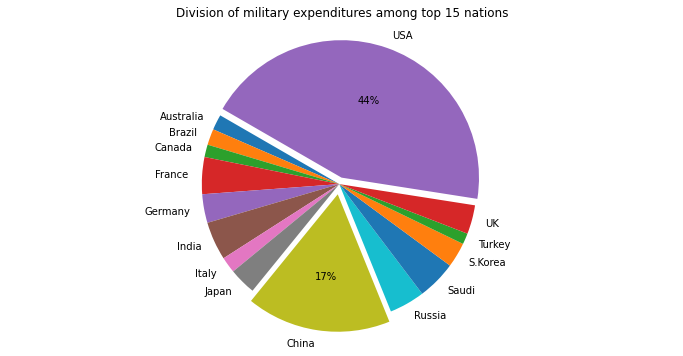

In [3]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = df.index
data = df.iloc[:, 0]
explode = [0] * len(df)

# Attempt to emphasize the largest spenders visually
explode[df.index.get_loc('USA')] = 0.05  # Pull out slice for USA
explode[df.index.get_loc('China')] = 0.075 # And for China

# Numbers only have room in the larger slices
def show_large(x):
    return f"{int(x):d}%" if x > 15 else ""

# Choose a figure size a bit larger than default, and make sure circle is round
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw=dict(aspect="equal"))
wedges, texts, percents = ax.pie(data, 
                                 labels=labels, 
                                 explode=explode, 
                                 startangle=150, 
                                 autopct=show_large)

ax.set_title('Division of military expenditures among top 15 nations')
# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal');  

As if there were not enough problems, the colors in pie charts—including this one—have no actual information value, but might mislead viewers to expect meaning rather than mere decoration. Were you to utilize color to encode other information—such as GDP percentage—we would likely wind up with wedges whose boundaries were not discernable.

---
### (Mis)judging area

A common device in popular infographics is to use shapes with areas meant to represent the degree of quantities.  Humans are *very bad* at visually comparing areas.  In a very rough way, "bigger" vs. "smaller" are visual judgements we can make (albeit, proximity and color can often mislead us also).  But in any finer detail of judging relative quantities, this style amounts to "chartjunk" (a Tufte term).

Here again we make a sincere effort to enlist this format in a useful presentation.  We even try to enlist colors to represent GDP percentage at the same time as size to represent absolute amount.  The effect is minimally successful, since humans judge neither area nor precise color difference all that well.

In [4]:
from matplotlib import cm
cmap = cm.get_cmap('inferno')
df = df.sort_index(ascending=False)

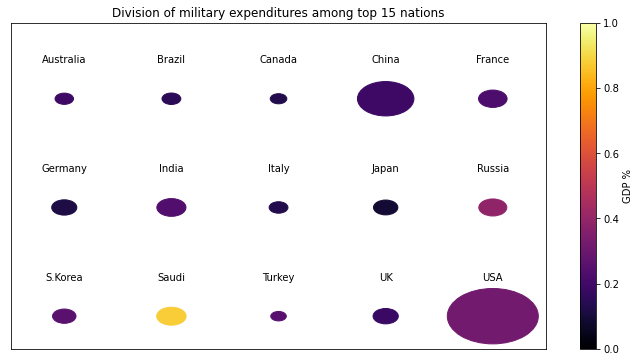

In [5]:
# Choose a figure size a bit larger than default
# Force circles rather than ellipses with `subplot_kw={'aspect':"equal"}`
fig, ax = plt.subplots(figsize=(12, 6))
spend = "Spending (USD x 1e8)"
gdp = "GDP %"

for i in range(0, 15, 5):
    for j in range(0, 5):
        x = 0.9 - j/5
        y = 0.1 + i/15
        country = df.index[i+j]
        ax.text(x, y+0.11, country, horizontalalignment='center')
        radius = math.sqrt(df.loc[country, spend])/300
        percent = df.loc[country, gdp]
        circ = plt.Circle((x, y), radius=radius, color=cmap(percent/10))
        ax.add_patch(circ)

cbar = fig.colorbar(cm.ScalarMappable(cmap=cmap), ax=ax)
cbar.set_label("GDP %")

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Division of military expenditures among top 15 nations');

---
### Even worse area judgements

We do not prepare one in Matplotlib—although it is certainly capable of using complex outlines—but one infographic device often enlisted is to use meaningful or iconic shapes, such as territorial boundaries or cartoons of familiar objects, for shapes that are in turn scaled.

While this effect can certainly be "cute" it makes judgement of actual quantities even more difficult than with circles or other similar simple shapes. Beyond some very gross judgements like "Germany is bigger by exports than by geographic area," all fine detail of the information is lost to surface visual design.  "Helpfully," the numbers that could be placed in a small table are scattered near the map adornments.

![Top exporters](img/illustration_acta_publica_ed_207_-_top_exporters_2017_edited.jpg)

---
### Misuse of pseudo-3D

At times you will be tempted to add 3-D "perspective" to charts to attempt to capture an additional dimension of data.  There are rare cases where this is genuinely useful, but most of the time it simply obscures some data while also distorting judgements about comparative quantities.

We humans are not *all that good* at adjusting for the the effect of perspective in quantitative judgements.  How high is that tall bar near the front (the USA)? What is going on in the visually obscured bars (even with some alpha transparency)? It is just hard to tell!

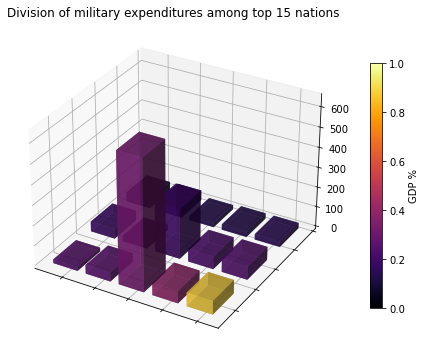

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

spend = "Spending (USD x 1e8)"
gdp = "GDP %"
df = df.sort_values(gdp, ascending=False)

for i in range(0, 15, 5):
    for j in range(0, 5):
        x = 0.9 - j/5
        y = 0.1 + i/15
        country = df.index[i+j]
        amount = df.loc[country, spend]
        percent = df.loc[country, gdp]
        ax.bar3d(x, y, 0, 0.15, 0.2, amount, color=cmap(percent/10), alpha=0.7)

cbar = fig.colorbar(cm.ScalarMappable(cmap=cmap), ax=ax, shrink=0.75)
cbar.set_label("GDP %")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.set_title('Division of military expenditures among top 15 nations');
plt.show()

<h2 style="font-weight: bold;">
    Good graphs
</h2>

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

Often a good way of presenting small data is with bar charts.  The human eye can judge relative lengths better than areas, and very strongly better than colors or shapes.  In terms of visual judgements, humans can judge accurately in roughly this order of features ([an excellent summary here](https://socviz.co/lookatdata.html)):

* Position on a common scale (e.g. bar charts)
* Position on unaligned scales (e.g. stacked bars)
* Length
* Tilt or angle
* 2D area (e.g. sized circles; but irregular shapes are worse)
* Color hue
* 3D volume
* Curvature and shape distinctions
* Color luminance
* Color saturation

Taking those perceptual cues, choosing bar charts to represent the two quantities per nation category seems like a good choice.

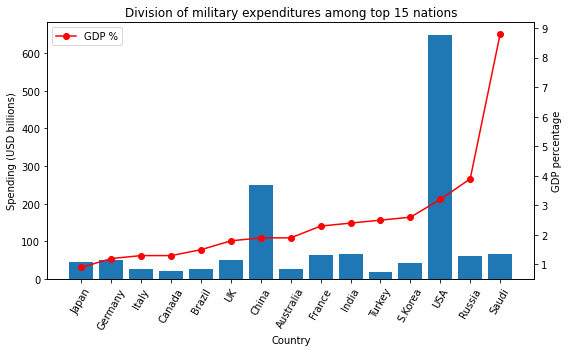

In [7]:
df = df.sort_values("GDP %")
fig, ax1 = plt.subplots(figsize=(8, 5))
spending = df["Spending (USD x 1e8)"]
gdp = df["GDP %"]

ax1.set_xlabel('Country')
ax1.set_ylabel('Spending (USD billions)')
ax1.bar(df.index, spending)
plt.xticks(rotation=60)

ax2 = ax1.twinx()  # a second axes that shares the same x-axis
ax2.set_ylabel("GDP percentage")  # already handled the x-label
ax2.plot(df.index, gdp, color="red", marker='o', label="GDP %")
ax2.legend()

ax1.set_title('Division of military expenditures among top 15 nations')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

This final design intentionally lacks any great visual "pizzaz," but it makes all the data from the two trends easy to identify and compare.

<h2 style="font-weight: bold;">
    Appropriate Scaling
</h2>

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

One common distortion in graphs that are otherwise well designed is very common in media and popular use.  Selecting particular ranges and scales for data often strongly affects viewer's perception of it. 

In our small dataset about military spending, we can illustrate this point.  The GDP percentage spent on military has a "natural" base of zero, in the sense that it cannot be less than that, but can also realistically be close to that.  But understanding the specific domain is essential to making the right choice.

If we exclude Saudi Arabia, Russia, and Japan, these following charts are both "true" yet tell a different story: 

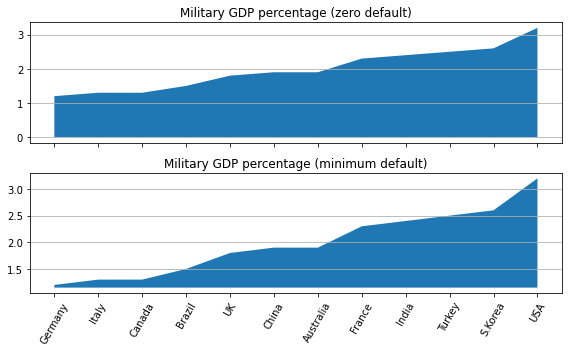

In [8]:
rates = df['GDP %']
rates = rates[(rates > 1) & (rates < 3.5)]

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8, 5), sharex=True)
ax1.fill_between(rates.index, 0.0, rates)
ax2.fill_between(rates.index, 1.15, rates)
ax1.yaxis.grid(True)
ax2.yaxis.grid(True)
ax1.set_title("Military GDP percentage (zero default)")
ax2.set_title("Military GDP percentage (minimum default)")
plt.xticks(rotation=60)
fig.tight_layout()  

Let us look at another example.  This is data from [The World Bank](https://data.worldbank.org/indicator/SP.DYN.LE00.IN?locations=EU) on life expectancy.  There is nothing numerically impossible about it approaching zero (albeit perhaps macabre to say), but we still tend to think of a "natural" level that is signficantly higher.  Let us make two additional similar graphs.  For what it's worth, the World Bank themselves present this with a "zero" of about 68 years for the EU.

In [9]:
life = pd.read_csv('data/API_SP.DYN.LE00.IN_DS2_en_csv_v2_656890.csv', 
                   skiprows=3, index_col='Country Name')
iran = life.loc['Iran, Islamic Rep.'].T.iloc[3:38].dropna()

Again we have two graphs, both equally true and describing the same data.  But in one story we see a slow but generally consistent improvement.  In the other we prominently see the tragic years starting from the Islamic Revolution through the Iraq-Iran War.  Neither of these narratives is *wrong*, but they are decidely different.

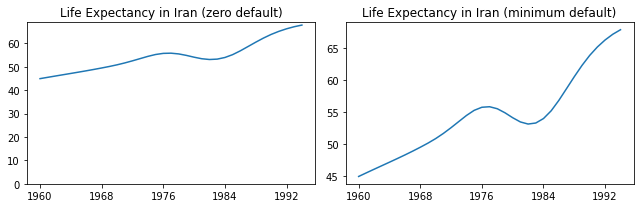

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9, 3), sharex=True)
ax1.plot(iran)
ax2.plot(iran)
ax1.set_ylim(bottom=0)
ax1.set_title("Life Expectancy in Iran (zero default)")
ax2.set_title("Life Expectancy in Iran (minimum default)")
ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
ax2.xaxis.set_major_locator(plt.MaxNLocator(5))
fig.tight_layout()  

<h2 style="font-weight: bold;">
    Incompatible quantities
</h2>

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

Alarmingly frequently, you will see plots where quantities in unrelated units are presented in a manner that compares them visually.  The documentation for Pandas uses exactly this invented example, without making it clear why it is harmful.  Unlike with the GDP percentage and total dollars of military spending of counrtries above, numerically the speed in kph and lifespan in years are of the same order of magnitude, and superficially similar thereby.

A stacked bar chart could make a nonsensical choice to aggregate these quantities per category.  Although fanciful here, this kind of error occurs in published material frequently.

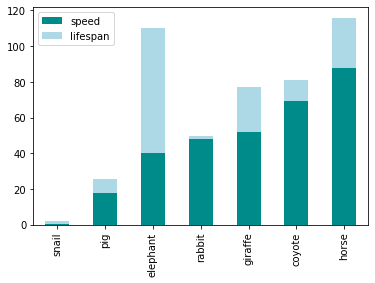

In [11]:
animals = pd.read_csv('data/animals.csv', index_col=0)
animals.plot.bar(stacked=True, color=['darkcyan', 'lightblue']);

One fix to this error is to use multiple plots with aligned category labels.

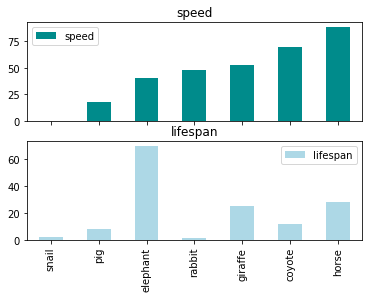

In [12]:
animals.plot.bar(subplots=True, color=['darkcyan', 'lightblue']);

<div style="width: 100%; height: 200px; background-color: #ef7d22; text-align: center; padding-top: 20px; margin-bottom: 40px;">
<br><br>

<h1 style="color: white; font-weight: bold;">
    Exercises
</h1>

<br><br> 
</div>


Although we have seen a few examples of Matplotlib in action to generate the above graphs, we have not provided any general explanation and instruction on it yet in this module.  For these exercises, try to think about the following datasets and simply make judgements about the **desirable** features of a visualization.

Working with pencil and paper to make approximations is a great way to address this.  They need not be entirely accurate, but you should be able to capture the general "shape" and technique of the graph you will later learn to produce at high quality.

<h2 style="font-weight: bold;">
    Population trends
</h2>

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

Borrowed from a [Wikipedia article](https://en.wikipedia.org/wiki/World_population_estimates), below are some data for past and projected population of different regions of the world. Our feeling is that some of these estimates are suspect, but without going into evidentiary details, how would you create one or more effective visualizations to represent this data?

In [13]:
population = pd.read_csv('data/population.csv', index_col='Region')
population

,Year 1,1000,1500,1600,1700,1820,1913,2000,2030
Region,,,,,,,,,
East Asia,74,88,166,223,216,469,613,1996,2417
South Asia,75,75,110,135,165,216,326,1372,2003
Europe,34,40,78,112,127,224,498,742,829
West Asia,19,20,18,21,21,25,39,237,370
Africa,17,32,47,55,61,74,125,798,1449
South/Central America,6,11,18,9,12,22,81,520,702
North America,1,1,2,2,1,11,105,314,413


What if you had considerably more data of this kind to work with? For example, if the regions were broken into roughly 250 units, such as the current number of nation states, how would that change your visualizations?  

What if the data had many more dates within it? For example, what if it went back to 10,000 BCE (some estimates go back that far or further)? What if there were estimates for every decade of the time interval, and regularly spaced?

Moreover, what special concerns do you have with information visualization given the very uneven spacing of the dates with estimates in the current set?

<h2 style="font-weight: bold;">
    Weather data
</h2>

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

We looked at temperature and related data from a number of weather stations collected by NOAA in earlier modules.  The small subset we did some analyses of only covered a fraction of the weather stations observed (1253, which is less than 20% of all those collected in 2019), and only for part of 2019.  The complete data NOAA provides goes back well over a century (although presumably most weather stations do not have continuity for that entire period).

In [14]:
url = ("data/NOAA-2019-partial.csv.gz")
temperatures = pd.read_csv(url)
temperatures['DATE'] = pd.to_datetime(temperatures.DATE, format="%Y-%m-%d")
temperatures

,DATE,STATION,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,...,MXSPD,GUST,MAX,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
0,2019-01-01,1001099999,70.933333,-8.666667,9.0,"JAN MAYEN NOR NAVY, NO",24.0,24,15.5,24,...,18.5,31.5,30.2,*,17.4,,0.00,G,NaN,1000
1,2019-01-02,1001099999,70.933333,-8.666667,9.0,"JAN MAYEN NOR NAVY, NO",36.2,24,31.3,24,...,33.0,43.5,44.1,,28.2,,0.00,G,NaN,10000
2,2019-01-03,1001099999,70.933333,-8.666667,9.0,"JAN MAYEN NOR NAVY, NO",35.5,24,31.6,24,...,29.9,46.4,39.2,*,33.6,,0.00,G,NaN,10000
3,2019-01-04,1001099999,70.933333,-8.666667,9.0,"JAN MAYEN NOR NAVY, NO",35.8,24,32.5,24,...,22.1,42.7,41.0,,33.6,,0.29,G,NaN,100000
4,2019-01-05,1001099999,70.933333,-8.666667,9.0,"JAN MAYEN NOR NAVY, NO",35.8,23,34.6,23,...,27.6,39.8,38.1,*,34.2,*,0.00,G,NaN,101000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425636,2019-12-16,6990099999,47.133333,9.516667,463.0,"VADUZ, LS",61.0,24,30.6,24,...,28.0,999.9,65.3,,35.6,,0.00,G,NaN,0
425637,2019-12-17,6990099999,47.133333,9.516667,463.0,"VADUZ, LS",64.7,24,34.1,24,...,28.9,999.9,66.9,,61.7,*,0.00,G,NaN,0
425638,2019-12-18,6990099999,47.133333,9.516667,463.0,"VADUZ, LS",50.6,24,38.6,24,...,8.9,999.9,64.0,*,42.6,*,0.00,G,NaN,0
425639,2019-12-19,6990099999,47.133333,9.516667,463.0,"VADUZ, LS",61.4,24,31.6,24,...,22.9,999.9,65.5,,39.7,,0.00,G,NaN,0


Think about two issues.  What would be effective visualizations for just this fraction of a year and northern latitudes? 

This limited set is still 425k rows.  Think about only the temperature features, which include mean, min, and max, on a daily basis.  Of course, these are likely to be correlated with date, latitude, altitude, and perhaps longitude as well.

After considering good visualizations for the data we have played with, how would you extend or substitute these visualizations with ones spanning many years? The larger set would *both* increase the general size of the dataset, but also introduce expected annual cyclicities that we do not see in less than one year of data.

<div style="width: 100%; height: 400px; background-color: #222; text-align: center; padding-top: 120px;">
<br><br>

<h1 style="color: white; font-weight: bold;">
    Review and questions
</h1>

<br><br> 
</div>

---
<div style="position: relative; text-align: right;">
<img src="https://user-images.githubusercontent.com/7065401/98614301-dcf01780-22d6-11eb-9c8f-65ebfceac6f6.png" style="width: 130px; display: inline-block;"></img>

<img src="https://user-images.githubusercontent.com/7065401/98864025-08deda80-2448-11eb-9600-22aa17884cdf.png" style="height: 100%; max-height: inherit; position: absolute; top: 20%; left: 0px;"></img>
<br>

<h2 style="font-weight: bold;">
    David Mertz, Ph.D.
</h2>

<h3 style="color: #ef7d22; margin-top: 0.8em">
    Data Scientist
</h3>
<hr>
<br><br>

<p style="font-size: 80%; text-align: right; margin: 10px 0px;">
    david.mertz@gmail.com
</p>
<p style="font-size: 80%; text-align: right; margin: 10px 0px;">
    linkedin.com/in/dmertz/
</p>

</div>

<br><br><br>